In [ ]:
!git clone https://github.com/facebookresearch/ImageBind
%cd ImageBind
# remember to get rid of mayavi reguirements

Cloning into 'ImageBind'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 146 (delta 60), reused 39 (delta 39), pack-reused 58 (from 1)
Receiving objects: 100% (146/146), 2.64 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/content/ImageBind


In [ ]:
!pip install .

Processing /content/ImageBind
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-install-ps0nhrwm/pytorchvideo_6d15d2e0c0f0452cb75689909647c9db
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-ps0nhrwm/pytorchvideo_6d15d2e0c0f0452cb75689909647c9db
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [ ]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.7 MB/s eta 0:00:00


In [ ]:
!pip install laion-clap

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 7.2 MB/s eta 0:00:00
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=270ec3914cab9daa297745c923eb51bf8760318d8d75dabe395ce38879c1c485
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=06bd4c5acb51644f8cf495f5204524e4c8042812474c97a7558a14028d869e05
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built progressbar wget
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninsta

In [ ]:
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

ib_model = imagebind_model.imagebind_huge(pretrained=True)
ib_model.eval()
ib_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


  0%|          | 0.00/4.47G [00:00<?, ?B/s]

ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [ ]:
import torch
from PIL import Image
import open_clip

clip_model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
clip_model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
import numpy as np

def get_row_recall_at_k(confusion_matrix, k=5):
    """
    Calculate the percentage of rows where the diagonal element is among the top K values.

    Parameters:
    confusion_matrix : array-like
        A square confusion matrix where rows represent actual classes
        and columns represent predicted classes
    k : int, optional (default=5)
        Number of top values to consider

    Returns:
    float: Percentage (0-1) of rows where diagonal element is in top K values
    dict: Additional metrics including per-row results and ranks
    """
    # Convert input to numpy array if it isn't already
    conf_matrix = np.array(confusion_matrix)

    # Verify it's a square matrix
    if conf_matrix.shape[0] != conf_matrix.shape[1]:
        raise ValueError("Confusion matrix must be square")

    # Verify k is valid
    if k > conf_matrix.shape[1]:
        raise ValueError(f"k ({k}) cannot be larger than matrix width ({conf_matrix.shape[1]})")

    correct_rows = 0
    total_rows = conf_matrix.shape[0]

    # Store detailed results for each row
    row_results = []
    diagonal_ranks = []

    for i in range(total_rows):
        # Get the diagonal value for this row
        diagonal_value = conf_matrix[i, i]

        # Sort row values in descending order and get ranks
        row_sorted = np.sort(conf_matrix[i])[::-1]

        # Find rank of diagonal value (handling ties optimistically)
        # We use >= to give the best possible rank in case of ties
        rank = np.sum(conf_matrix[i] >= diagonal_value)
        diagonal_ranks.append(rank)

        # Check if diagonal value is in top k
        is_in_top_k = rank <= k
        row_results.append(is_in_top_k)

        if is_in_top_k:
            correct_rows += 1

    recall_at_k = correct_rows / total_rows

    # Compile detailed metrics
    metrics = {
        'recall_at_k': recall_at_k,
        'row_results': row_results,
        'diagonal_ranks': diagonal_ranks,
        'correct_rows': correct_rows,
        'total_rows': total_rows
    }

    return recall_at_k, metrics

# test
# Example confusion matrix
matrix = [
    [80, 10, 90, 20],  # Row 0: diagonal value 80 is 2nd highest
    [5,  95, 10, 15],  # Row 1: diagonal value 95 is highest
    [10, 5,  40, 50],  # Row 2: diagonal value 40 is 2nd highest
    [20, 15, 30, 60]   # Row 3: diagonal value 60 is highest
]

recall, metrics = get_row_recall_at_k(matrix, k=2)

print(recall)

1.0


In [ ]:
import numpy as np

def get_row_diagonal_accuracy(confusion_matrix):
    """
    Calculate the percentage of rows where the diagonal element is the highest value.

    Parameters:
    confusion_matrix : array-like
        A square confusion matrix where rows represent actual classes
        and columns represent predicted classes

    Returns:
    float: Percentage (0-1) of rows where diagonal element is highest
    """
    # Convert input to numpy array if it isn't already
    conf_matrix = np.array(confusion_matrix)

    # Verify it's a square matrix
    if conf_matrix.shape[0] != conf_matrix.shape[1]:
        raise ValueError("Confusion matrix must be square")

    correct_rows = 0
    total_rows = conf_matrix.shape[0]

    # For each row, check if diagonal element is the maximum
    for i in range(total_rows):
        if conf_matrix[i, i] >= np.max(conf_matrix[i]):  # >= handles case where diagonal equals another value
            correct_rows += 1

    return correct_rows / total_rows

def load_descriptions():
    """
    Load descriptions from descriptions.txt into a list where the index matches the description.
    Skips the header row.

    Returns:
        list: List of descriptions where index i contains the description for item i
    """
    descriptions = []
    with open("/content/drive/MyDrive/audiocap_processed/merged_output.csv", "r") as f:
        next(f)  # Skip the header row
        for line in f:
            idx, desc = line.strip().split(',', 1)
            # Make sure list is long enough
            while len(descriptions) <= int(idx):
                descriptions.append(None)
            descriptions[int(idx)] = desc
    return descriptions

def generate_uniform_hypersphere(m, n):
    """
    Generate m points uniformly distributed on an n-dimensional unit hypersphere.

    This implementation uses the fact that normalizing vectors sampled from a
    multivariate normal distribution results in uniform distribution on the sphere.

    Parameters:
    m (int): Number of vectors to generate
    n (int): Dimension of the space

    Returns:
    numpy.ndarray: Array of shape (m, n) containing m n-dimensional unit vectors
    """
    # Generate random vectors from standard normal distribution
    vectors = np.random.normal(0, 1, (m, n))

    # Normalize each vector to lie on unit hypersphere
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    uniform_vectors = vectors / norms

    return torch.tensor(uniform_vectors)

In [ ]:
import numpy as np
import os

def create_test_set():
  descriptions = load_descriptions()

  # Find which indices actually have both image and audio files
  valid_indices = []
  valid_image_indices = []
  for i in range(len(descriptions)):
      audio_path = f'/content/drive/MyDrive/audiocap_processed/audio/audio_{i}.wav'
      image_path = f'/content/drive/MyDrive/audiocap_processed/images/image_{i}.jpg'
      if os.path.exists(audio_path):
          valid_indices.append(i)
      if os.path.exists(image_path):
          valid_image_indices.append(i)

  # Shuffle the valid indices
  shuffled_valid_indices = np.random.permutation(valid_indices)

  # Take only N items (or all if less than N available)
  N = 25
  n_available = min(N, len(shuffled_valid_indices))
  selected_indices = shuffled_valid_indices[:n_available]

  # Create the path lists using only valid indices
  # image_paths = [f'/content/image_{i}.jpg' for i in selected_indices]
  audio_paths = [f'/content/drive/MyDrive/audiocap_processed/audio/audio_{i}.wav' for i in selected_indices]
  image_paths = [f'/content/drive/MyDrive/audiocap_processed/images/image_{i}.jpg' for i in valid_image_indices]
  text_list = [descriptions[i] for i in selected_indices]

  print(f"Found {len(valid_indices)} valid pairs, using {n_available}")

  return audio_paths, text_list, image_paths



In [ ]:
import pandas as pd
import random

def create_image_set():
  valid_indices = []
  valid_image_indices = []
  for i in range(1000):
      image_path = f'/content/image_{i}.jpg'
      if os.path.exists(image_path):
          valid_image_indices.append(i)

  image_paths = [f'/content/image_{i}.jpg' for i in valid_image_indices]

  return image_paths

def create_test_set2(num_samples=25, csv_path='/content/filename_mapping.csv'):
    """
    Extract random samples of audio filenames and their corresponding captions.

    Args:
        csv_path (str): Path to the filename_mapping.csv
        num_samples (int): Number of samples to extract
        seed (int): Random seed for reproducibility

    Returns:
        tuple: (list of audio filenames, list of corresponding captions)
    """

    # Read the CSV
    df = pd.read_csv(csv_path)

    # Ensure we don't try to get more samples than available
    num_samples = min(num_samples, len(df))

    # Randomly sample the dataframe
    sampled_df = df.sample(n=num_samples)

    # Extract lists
    audio_paths = [f'/content/{file}' for file in sampled_df['new_filename'].tolist()]
    text_list = sampled_df['caption'].tolist()

    return audio_paths, text_list

In [ ]:
audio_paths, text_list, image_paths = create_test_set()
# image_paths = create_image_set()
# audio_paths

Found 585 valid pairs, using 25


In [ ]:
def get_embeddings_imagebind(image_paths=None, audio_paths=None, text_list=None):
    embeddings = {}

    with torch.no_grad():
        # Process vision if provided
        if image_paths:
            vision_embeddings = []
            for img_path in image_paths:
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                inputs = {
                    ModalityType.VISION: data.load_and_transform_vision_data([img_path], device)
                }

                single_embedding = ib_model(inputs)
                vision_embeddings.append(single_embedding[ModalityType.VISION].cpu())

                del inputs, single_embedding

            embeddings[ModalityType.VISION] = torch.cat(vision_embeddings, dim=0)
            del vision_embeddings

        # Process audio if provided
        if audio_paths:
            audio_embeddings = []
            for audio_path in audio_paths:
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                inputs = {
                    ModalityType.AUDIO: data.load_and_transform_audio_data([audio_path], device)
                }

                single_embedding = ib_model(inputs)
                audio_embeddings.append(single_embedding[ModalityType.AUDIO].cpu())

                del inputs, single_embedding

            embeddings[ModalityType.AUDIO] = torch.cat(audio_embeddings, dim=0)
            del audio_embeddings

        # Process text if provided
        if text_list:
            text_embeddings = []
            for text in text_list:
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

                inputs = {
                    ModalityType.TEXT: data.load_and_transform_text([text], device)
                }

                single_embedding = ib_model(inputs)
                text_embeddings.append(single_embedding[ModalityType.TEXT].cpu())

                del inputs, single_embedding

            embeddings[ModalityType.TEXT] = torch.cat(text_embeddings, dim=0)
            del text_embeddings

    return embeddings


def get_embeddings_clip(image_paths, text_list):
  images = []
  for img_path in image_paths:
    img = Image.open(img_path).convert('RGB')
    images.append(preprocess(img))
  images = torch.stack(images).float()

  texts = tokenizer(text_list)

  with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = clip_model.encode_image(images)
    text_features = clip_model.encode_text(texts)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

  return image_features, text_features

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# audio_paths, text_list, image_paths = create_test_set()

# def compute_embeddings(audio_paths, text_list, image_paths):
#   # get embeddings
#   imagebind_embeddings = get_embeddings_imagebind(image_paths, audio_paths, text_list)
#   clip_image_embeddings, clip_text_embeddings = get_embeddings_clip(image_paths, text_list)

#   PHI_B1 = imagebind_embeddings[ModalityType.VISION].cpu()
#   PHI_B2 = clip_image_embeddings.cpu()
#   print(f'PHI_B1: {PHI_B1.shape}')
#   print(f'PHI_B2: {PHI_B2.shape}')


#   # get imagebind (audio) embedding and clip (language) embedding for the test pairs
#   embeddings_A = imagebind_embeddings[ModalityType.AUDIO].cpu()
#   embeddings_C= clip_text_embeddings
#   print(f'embeddings_A: {embeddings_A.shape}')
#   print(f'embeddings_C: {embeddings_C.shape}')

#   # imagebind (text) for direct eval
#   embeddings_B = imagebind_embeddings[ModalityType.TEXT].cpu()

#   return PHI_B1,

Found 511 valid pairs, using 25


In [ ]:
audio_paths

['/content/drive/MyDrive/audiocap_processed/audio/audio_227.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_517.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_28.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_200.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_583.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_494.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_108.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_174.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_82.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_89.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_443.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_266.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_279.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_172.wav',
 '/content/drive/MyDrive/audiocap_processed/audio/audio_510.wav',
 '/content/dr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_phi_matrices(image_paths):
    """Get PHI_B1 and PHI_B2 matrices from imagebind and CLIP image embeddings"""
    # Get embeddings for PHI matrices
    imagebind_embeddings = get_embeddings_imagebind(image_paths=image_paths)
    clip_image_embeddings, _ = get_embeddings_clip(image_paths, ["fake"])

    # Extract PHI matrices
    PHI_B1 = imagebind_embeddings[ModalityType.VISION].cpu()
    PHI_B2 = clip_image_embeddings.cpu()

    print(f'PHI_B1: {PHI_B1.shape}')
    print(f'PHI_B2: {PHI_B2.shape}')

    return PHI_B1, PHI_B2

def get_test_embeddings(audio_paths, text_list):
    """Get embeddings for the test pairs (A, B, C)"""
    # Get embeddings from both models
    imagebind_embeddings = get_embeddings_imagebind(audio_paths=audio_paths, text_list=text_list)
    _, clip_text_embeddings = get_embeddings_clip(["/content/drive/MyDrive/audiocap_processed/images/image_1.jpg"], text_list)

    # Extract required embeddings
    embeddings_A = imagebind_embeddings[ModalityType.AUDIO].cpu()  # imagebind audio
    embeddings_B = imagebind_embeddings[ModalityType.TEXT].cpu()   # imagebind text
    embeddings_C = clip_text_embeddings                           # CLIP text

    print(f'embeddings_A: {embeddings_A.shape}')
    print(f'embeddings_B: {embeddings_B.shape}')
    print(f'embeddings_C: {embeddings_C.shape}')

    return embeddings_A, embeddings_B, embeddings_C

def compute_embeddings(audio_paths, text_list, image_paths):
    """Main function that computes all required embeddings"""
    # Get PHI matrices
    PHI_B1, PHI_B2 = get_phi_matrices(image_paths)

    # Get test embeddings
    embeddings_A, embeddings_B, embeddings_C = get_test_embeddings(audio_paths, text_list)

    return PHI_B1, PHI_B2, embeddings_A, embeddings_B, embeddings_C

# Example usage
audio_paths, text_list, image_paths = create_test_set()
# image_paths = create_image_set()
# PHI_B1, PHI_B2, embeddings_A, embeddings_B, embeddings_C = compute_embeddings(audio_paths, text_list, image_paths)

Found 585 valid pairs, using 25


In [ ]:
audio_paths, text_list, image_paths = create_test_set()

PHI_B1, PHI_B2 = get_phi_matrices(image_paths)

Found 585 valid pairs, using 25
PHI_B1: torch.Size([585, 1024])
PHI_B2: torch.Size([585, 512])


In [ ]:
image_paths

['/content/drive/MyDrive/audiocap_processed/images/image_0.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_1.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_2.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_3.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_4.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_5.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_6.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_7.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_8.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_9.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_10.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_11.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_12.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_14.jpg',
 '/content/drive/MyDrive/audiocap_processed/images/image_15.jpg',
 '/content/drive/MyD

In [ ]:
embeddings_A, embeddings_B, embeddings_C = get_test_embeddings(audio_paths, text_list)

embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])


In [ ]:
import numpy as np
import librosa
import torch
import laion_clap

# quantization
def int16_to_float32(x):
    return (x / 32767.0).astype(np.float32)


def float32_to_int16(x):
    x = np.clip(x, a_min=-1., a_max=1.)
    return (x * 32767.).astype(np.int16)

clap_model = laion_clap.CLAP_Module(enable_fusion=False)
clap_model.load_ckpt() # download the default pretrained checkpoint.


# Directly get audio embeddings from audio files
audio_file = [
    '/content/drive/MyDrive/audiocap_processed/audio/audio_1.wav',
]
audio_embed = clap_model.get_audio_embedding_from_filelist(x = audio_file, use_tensor=False)
print(audio_embed[:,-20:])
print(audio_embed.shape)

# Get text embedings from texts:
text_data = ["I love the contrastive learning", "I love the pretrain model"]
text_embed = clap_model.get_text_embedding(text_data)
print(text_embed)
print(text_embed.shape)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Load our best checkpoint in the paper.
Download completed!
Load Checkpoint...
logit_scale_a 	 Loaded
logit_scale_t 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_real.weight 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_imag.weight 	 Loaded
audio_branch.logmel_extractor.melW 	 Loaded
audio_branch.bn0.weight 	 Loaded
audio_branch.bn0.bias 	 Loaded
audio_branch.patch_embed.proj.weight 	 Loaded
audio_branch.patch_embed.proj.bias 	 Loaded
audio_branch.patch_embed.norm.weight 	 Loaded
audio_branch.patch_embed.norm.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm1.weight 	 Loaded
audio_branch.layers.0.blocks.0.norm1.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.relative_position_bias_table 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm2.weight 	 Loaded
aud

In [ ]:

def run_trial(PHI_B1, PHI_B2, k, tau1=5, tau2=5, M=512):
    audio_paths, text_list, image_paths = create_test_set()
    embeddings_A, embeddings_B, embeddings_C = get_test_embeddings(audio_paths, text_list)

    clap_embeddings_A = clap_model.get_audio_embedding_from_filelist(x = audio_paths)
    clap_embeddings_B = clap_model.get_text_embedding(text_list)

    direct_grid = embeddings_A @ embeddings_B.T
    acc_direct = get_row_diagonal_accuracy(direct_grid)

    clap_direct_grid = clap_embeddings_A @ clap_embeddings_B.T
    clap_acc_direct = get_row_diagonal_accuracy(clap_direct_grid)

    partial_PHI_B1 = PHI_B1[:M]
    partial_PHI_B2 = PHI_B2[:M]

    # Move all data to GPU at once
    embeddings_A_gpu = embeddings_A.cuda()  # [A, d1]
    embeddings_C_gpu = embeddings_C.cuda()  # [C, d2]
    partial_PHI_B1_gpu = partial_PHI_B1.float().cuda()  # [M, d1]
    partial_PHI_B2_gpu = partial_PHI_B2.float().cuda()  # [M, d2]

    # Compute the terms separately using batch matrix multiplication
    term1 = embeddings_A_gpu @ partial_PHI_B1_gpu.T / tau1  # [A, M]
    term2 = partial_PHI_B2_gpu @ embeddings_C_gpu.T / tau2  # [M, C]

    # Combine terms and sum over M dimension
    grid_lse = torch.sum(torch.exp(term1.unsqueeze(2) + term2.unsqueeze(0)), dim=1)  # [A, C]

    # Move result back to CPU and check for inf values
    grid_lse = grid_lse.cpu().numpy()

    if np.any(np.isinf(grid_lse)):
        print(f"WARNING: Infinite values detected in grid_lse with tau1={tau1}, tau2={tau2}")
        print("Consider using smaller tau values to prevent numerical overflow")
        # Optionally print positions of inf values
        inf_positions = np.where(np.isinf(grid_lse))
        print(f"Infinite values found at positions: {inf_positions}")

    acc_lse = get_row_diagonal_accuracy(grid_lse)
    print(f'acc_direct: {acc_direct}')
    print(f'acc_lse: {acc_lse}')
    print(f'acc_clap: {clap_acc_direct}')

    return acc_direct, acc_lse, clap_acc_direct


In [ ]:
run_trial(PHI_B1, PHI_B2, k=10, tau1=0.25, tau2=0.25, M=250)

Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.28
acc_clap: 0.76


(0.56, 0.28, 0.76)

In [ ]:
print(grid_lse)

NameError: name 'grid_lse' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def run_multiple_trials(n_trials, k=10, tau1=1, tau2=1, M=512):
    # Store results
    direct_results = []
    lse_results = []
    clap_results = []

    # Run trials
    for i in range(n_trials):
        print(f"Running trial {i+1}/{n_trials}")
        acc_direct, acc_lse, acc_clap = run_trial(PHI_B1, PHI_B2, k=k, tau1=tau1, tau2=tau2, M=M)
        # if acc_lse > 0.05:  # Keep the existing filter
        direct_results.append(acc_direct)
        lse_results.append(acc_lse)
        clap_results.append(acc_clap)

    # Calculate means and confidence intervals
    direct_mean = np.mean(direct_results)
    lse_mean = np.mean(lse_results)
    clap_mean = np.mean(clap_results)

    # 95% confidence intervals
    direct_ci = stats.sem(direct_results) * stats.t.ppf((1 + 0.95) / 2, len(direct_results)-1)
    lse_ci = stats.sem(lse_results) * stats.t.ppf((1 + 0.95) / 2, len(lse_results)-1)
    clap_ci = stats.sem(clap_results) * stats.t.ppf((1 + 0.95) / 2, len(clap_results)-1)

    # Create bar plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Increased width to accommodate third bar

    # Plot bars
    x = np.arange(3)  # Three bars now
    bars = ax.bar(x, [direct_mean, lse_mean, clap_mean],
                 yerr=[direct_ci, lse_ci, clap_ci],
                 capsize=5, width=0.4,
                 color=['lightblue', 'lightgreen', 'lightcoral'])

    # Customize plot
    ax.set_xticks(x)
    ax.set_xticklabels(['Direct', 'LSE', 'CLAP'])
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Accuracy Comparison (n={n_trials} trials)')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

    # Store numerical results
    results = {
        'direct': {
            'mean': direct_mean,
            'ci': direct_ci,
            'all_values': direct_results
        },
        'lse': {
            'mean': lse_mean,
            'ci': lse_ci,
            'all_values': lse_results
        },
        'clap': {
            'mean': clap_mean,
            'ci': clap_ci,
            'all_values': clap_results
        }
    }

    return results, fig



Running trial 1/100
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17]), array([ 1,  2,  3,  4,  7,  8,  9, 10, 12, 14, 15, 16, 17, 19, 20, 21, 22,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct: 0.6
acc_lse: 0.48
acc_clap: 0.88
Running trial 2/100
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 

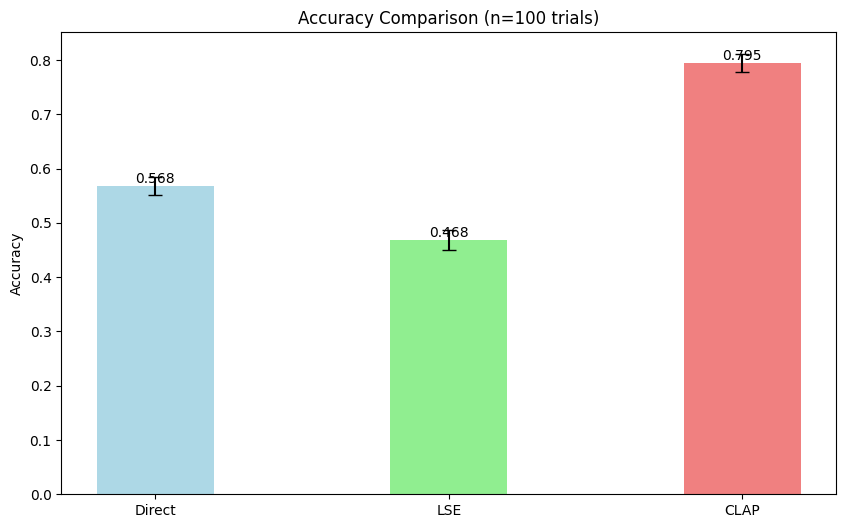


Detailed Results:
Direct: 0.568 ± 0.017
LSE: 0.468 ± 0.018
CLAP: 0.795 ± 0.016


In [ ]:
# Usage example:
tau_vals = [0.25, 0.5, 1., 2.]

results, fig = run_multiple_trials(n_trials=100, k=1, tau1=0.1, tau2=0.1, M=580)
plt.show()

# Print detailed results
print("\nDetailed Results:")
print(f"Direct: {results['direct']['mean']:.3f} ± {results['direct']['ci']:.3f}")
print(f"LSE: {results['lse']['mean']:.3f} ± {results['lse']['ci']:.3f}")
print(f"CLAP: {results['clap']['mean']:.3f} ± {results['clap']['ci']:.3f}")

Running for M = 4
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.08
acc_clap: 0.76
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.04
acc_clap: 0.84
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.08
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.16
acc_clap: 0.68
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512]

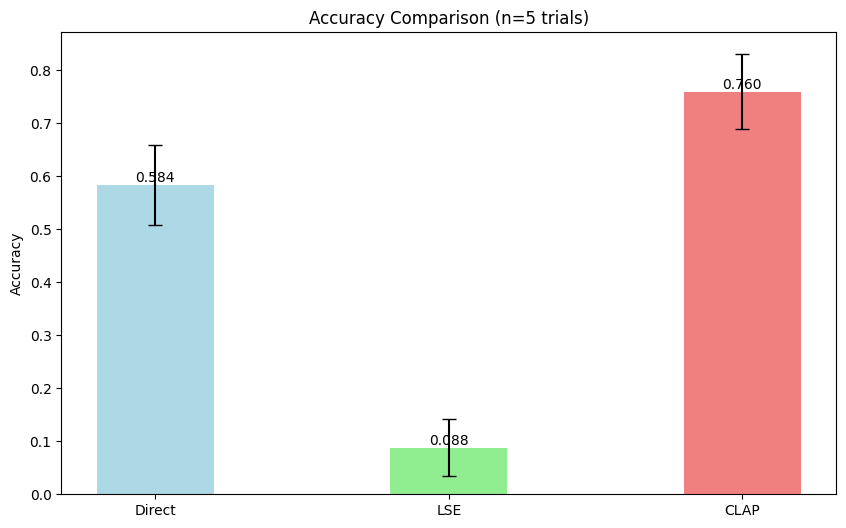


Detailed Results:
Direct: 0.584 ± 0.075
LSE: 0.088 ± 0.054
CLAP: 0.760 ± 0.070
Running for M = 16
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.16
acc_clap: 0.76
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.16
acc_clap: 0.72
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.12
acc_clap: 0.96
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.16
acc_clap: 0.72
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25

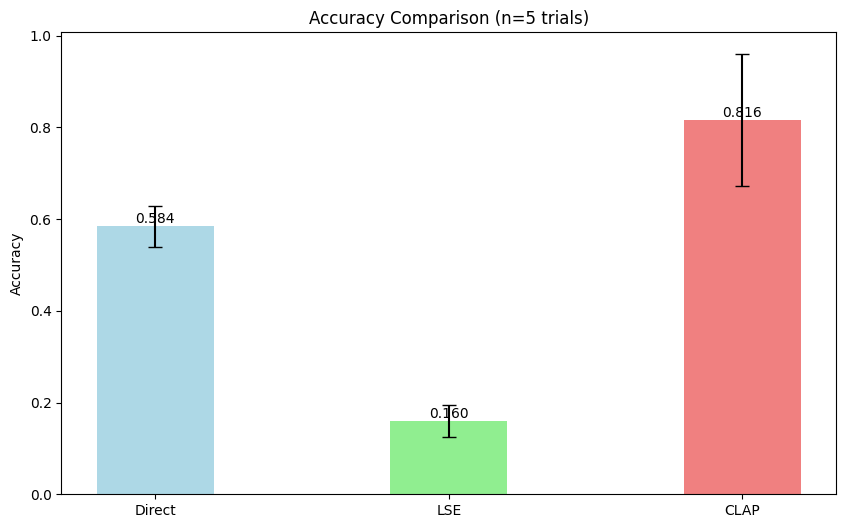


Detailed Results:
Direct: 0.584 ± 0.044
LSE: 0.160 ± 0.035
CLAP: 0.816 ± 0.143
Running for M = 64
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.12
acc_clap: 0.68
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.32
acc_clap: 0.96
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.4
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.44
acc_lse: 0.16
acc_clap: 0.64
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 

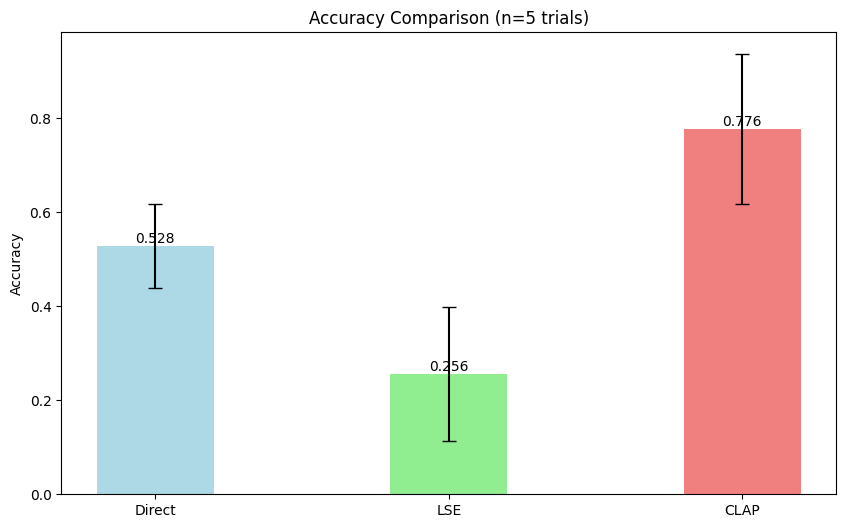


Detailed Results:
Direct: 0.528 ± 0.089
LSE: 0.256 ± 0.143
CLAP: 0.776 ± 0.159
Running for M = 128
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.24
acc_clap: 0.76
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.28
acc_clap: 0.84
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.4
acc_clap: 0.88
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.16
acc_clap: 0.76
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([2

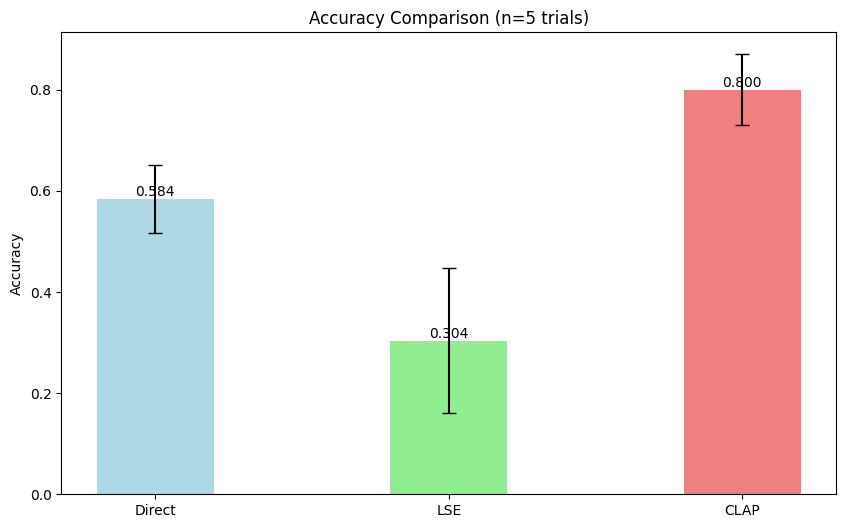


Detailed Results:
Direct: 0.584 ± 0.067
LSE: 0.304 ± 0.143
CLAP: 0.800 ± 0.070
Running for M = 256
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.44
acc_clap: 0.72
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.4
acc_clap: 0.72
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.68
acc_lse: 0.36
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.48
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25

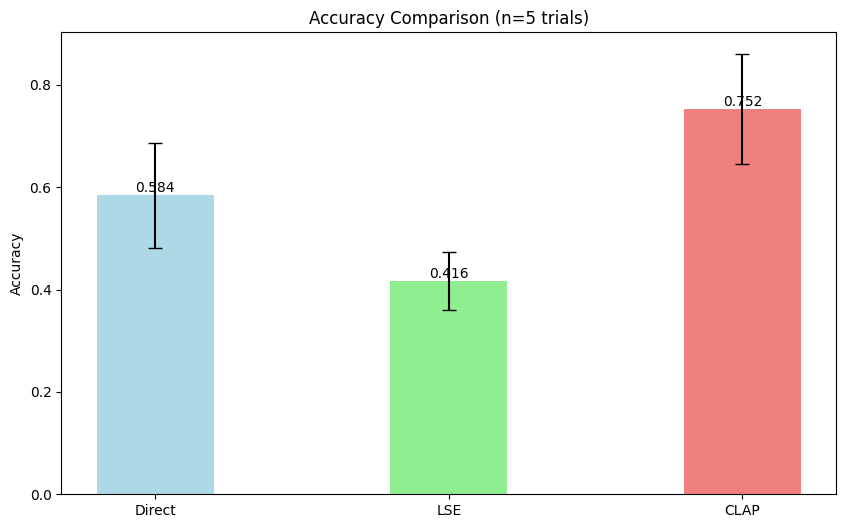


Detailed Results:
Direct: 0.584 ± 0.103
LSE: 0.416 ± 0.057
CLAP: 0.752 ± 0.108
Running for M = 512
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.48
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.52
acc_clap: 0.8
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.4
acc_clap: 0.88
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.48
acc_clap: 0.68
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 

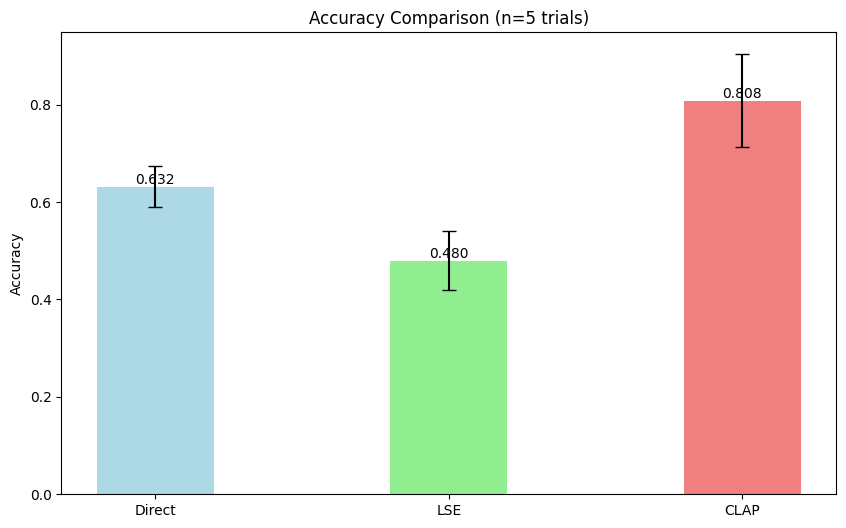


Detailed Results:
Direct: 0.632 ± 0.042
LSE: 0.480 ± 0.061
CLAP: 0.808 ± 0.096


In [ ]:
# Usage example:
# tau_vals = [0.25, 0.5, 1., 2.]

M_vals = [4, 16, 64, 128, 256, 512, 580]

for M in M_vals:
  print(f'Running for M = {M}')
  results, fig = run_multiple_trials(n_trials=5, k=1, tau1=0.25, tau2=0.25, M=M)
  plt.show()

  # Print detailed results
  print("\nDetailed Results:")
  print(f"Direct: {results['direct']['mean']:.3f} ± {results['direct']['ci']:.3f}")
  print(f"LSE: {results['lse']['mean']:.3f} ± {results['lse']['ci']:.3f}")
  print(f"CLAP: {results['clap']['mean']:.3f} ± {results['clap']['ci']:.3f}")

Running trials for different M values...


  0%|          | 0/7 [00:00<?, ?it/s]


Running for M = 4
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.08
acc_clap: 0.8
Running trial 2/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.08
acc_clap: 0.88
Running trial 3/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.04
acc_clap: 0.92
Running trial 4/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.04
acc_clap: 0.52
Running trial 5/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 51

 14%|█▍        | 1/7 [00:52<05:17, 52.94s/it]

acc_direct: 0.64
acc_lse: 0.08
acc_clap: 0.68
Direct: 0.600 ± 0.043
LSE: 0.064 ± 0.015
CLAP: 0.756 ± 0.103

Running for M = 16
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.24
acc_clap: 0.76
Running trial 2/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.16
acc_clap: 0.8
Running trial 3/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.4
acc_lse: 0.12
acc_clap: 0.8
Running trial 4/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.72
acc_lse: 0.2
acc_clap: 0.76
Running trial 5/10
Found 585 valid pairs, using 2

 29%|██▊       | 2/7 [01:44<04:20, 52.11s/it]

acc_direct: 0.48
acc_lse: 0.2
acc_clap: 0.6
Direct: 0.576 ± 0.111
LSE: 0.164 ± 0.044
CLAP: 0.780 ± 0.065

Running for M = 64
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.2
acc_clap: 0.68
Running trial 2/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct: 0.68
acc_lse: 0.24
acc_clap: 0.88
Running trial 3/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embe

 43%|████▎     | 3/7 [02:36<03:27, 51.86s/it]

Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct: 0.72
acc_lse: 0.28
acc_clap: 0.84
Direct: 0.584 ± 0.051
LSE: 0.272 ± 0.046
CLAP: 0.760 ± 0.059

Running for M = 128
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([21, 21, 21]), array([ 2,  7, 21]))
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.6
Running trial 2/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical

 57%|█████▋    | 4/7 [03:27<02:35, 51.74s/it]

acc_direct: 0.68
acc_lse: 0.28
acc_clap: 0.8
Direct: 0.576 ± 0.047
LSE: 0.324 ± 0.046
CLAP: 0.744 ± 0.059

Running for M = 256
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct: 0.52
acc_lse: 0.36
acc_clap: 0.6
Running trial 2/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1

 71%|███████▏  | 5/7 [04:20<01:44, 52.33s/it]

Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct:

 86%|████████▌ | 6/7 [05:12<00:52, 52.12s/it]

Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))
acc_direct: 0.64
acc_lse: 0.56
acc_clap: 0.8
Direct: 0.588 ± 0.045
LSE: 0.512 ± 0.066
CLAP: 0.796 ± 0.068

Running for M = 580
Running trial 1/10
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,  7,  8,  8,  8,  8, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15

100%|██████████| 7/7 [06:06<00:00, 52.32s/it]

Consider using smaller tau values to prevent numerical overflow
Infinite values found at positions: (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24,  1,  3,  4,  5,  6,  8,  9, 11, 12,
       15, 17, 19, 20, 21, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]))
acc_direct: 0.64
acc_lse: 0.64
acc_clap: 0.8
Direct: 0.560 ± 0.045
LSE: 0.488 ± 0.088
CLAP:

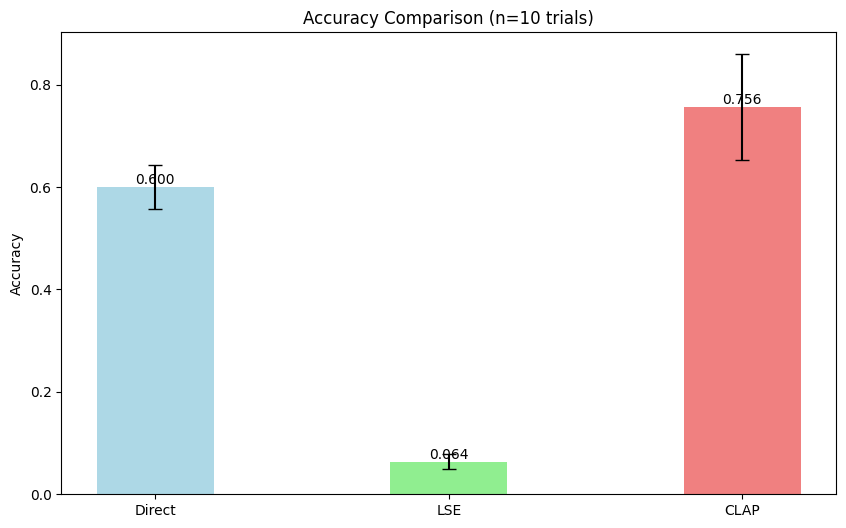

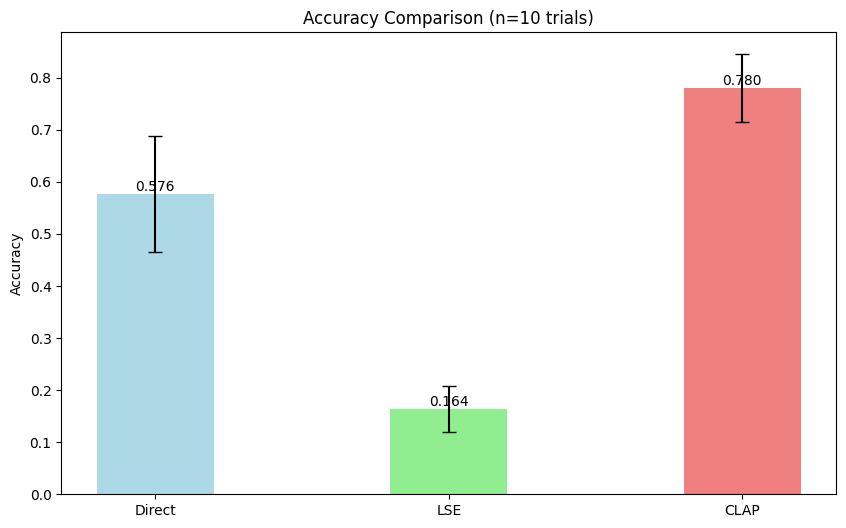

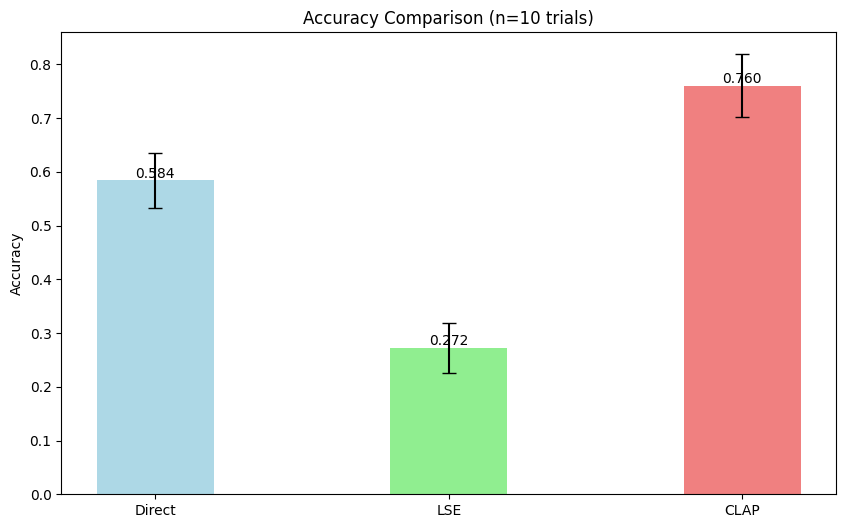

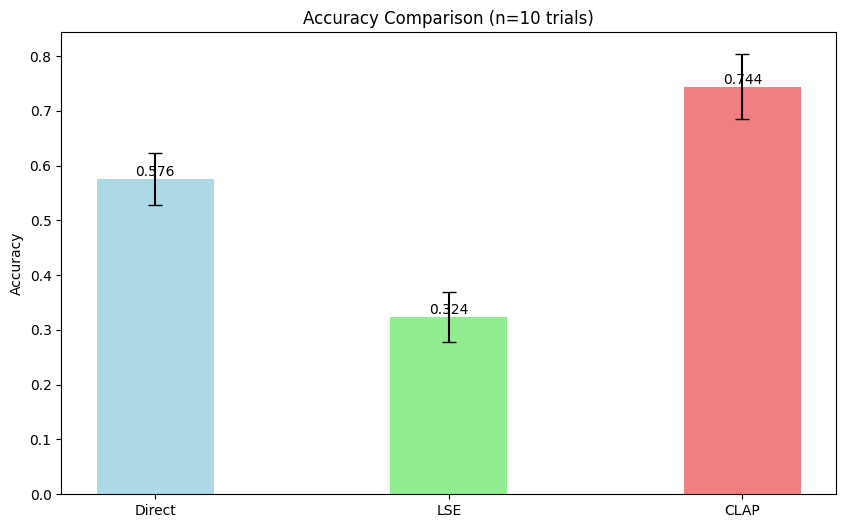

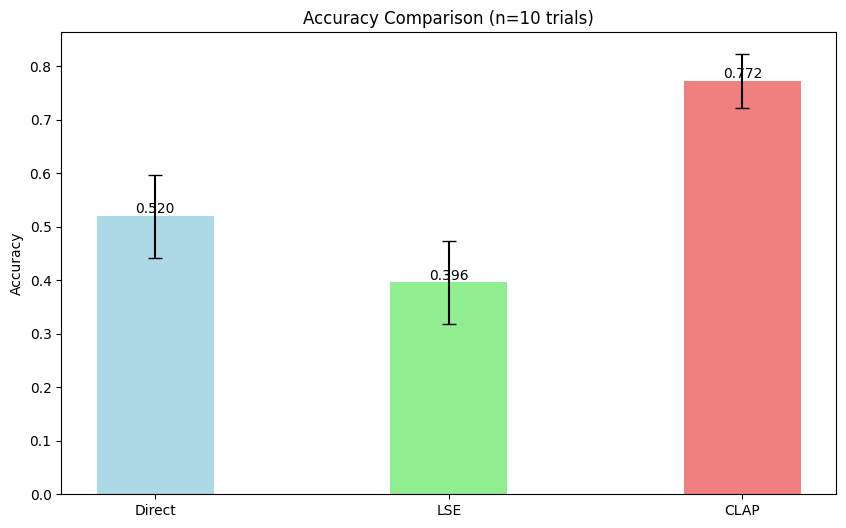

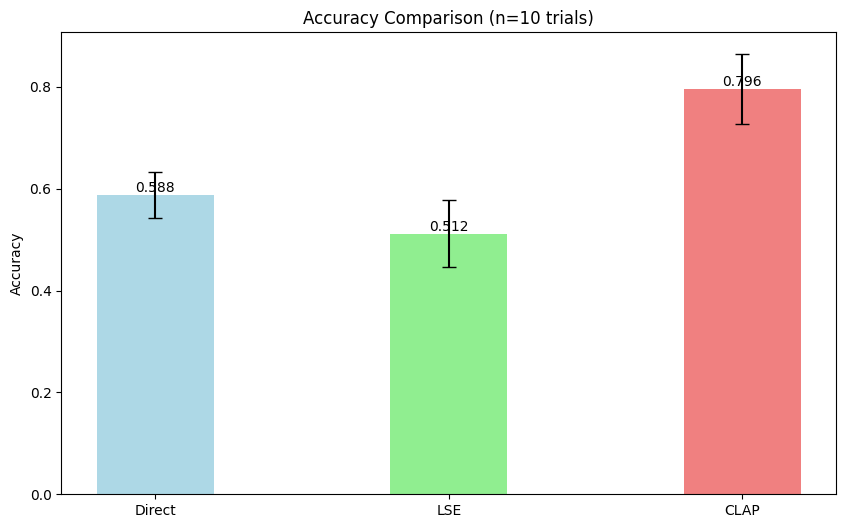

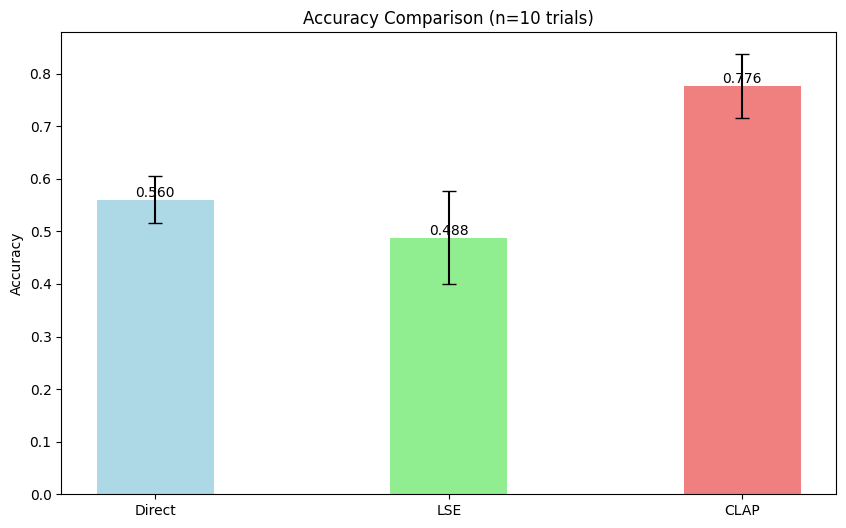

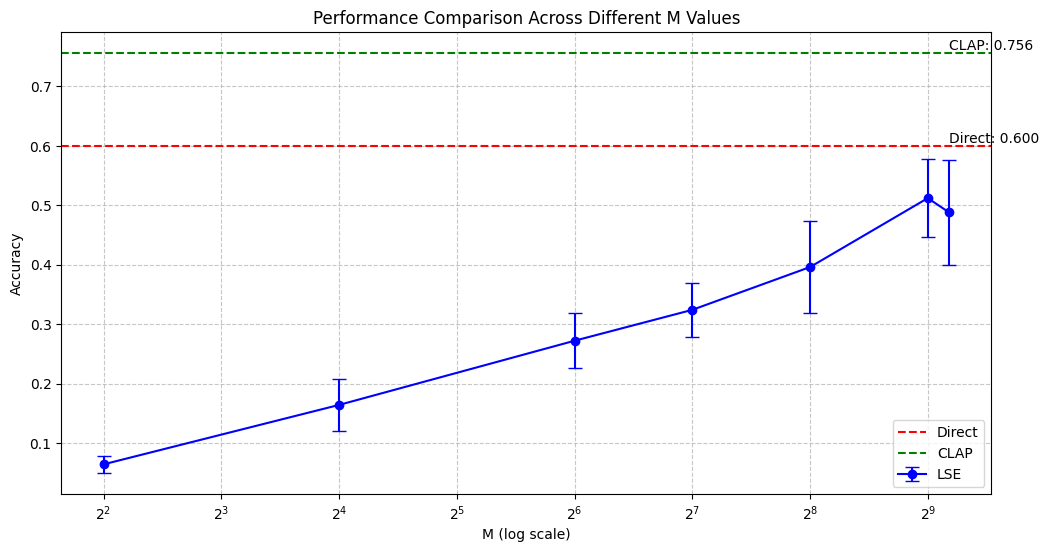

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def compare_M_values():
    M_vals = [4, 16, 64, 128, 256, 512, 580]
    results_list = []

    # Run trials for each M value
    print("Running trials for different M values...")
    for M in tqdm(M_vals):
        print(f'\nRunning for M = {M}')
        results, _ = run_multiple_trials(n_trials=10, k=1, tau1=0.1, tau2=0.1, M=M)
        results_list.append({
            'M': M,
            'direct': results['direct'],
            'lse': results['lse'],
            'clap': results['clap']
        })
        print(f"Direct: {results['direct']['mean']:.3f} ± {results['direct']['ci']:.3f}")
        print(f"LSE: {results['lse']['mean']:.3f} ± {results['lse']['ci']:.3f}")
        print(f"CLAP: {results['clap']['mean']:.3f} ± {results['clap']['ci']:.3f}")

    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Extract data for plotting
    M_values = [r['M'] for r in results_list]
    lse_means = [r['lse']['mean'] for r in results_list]
    lse_cis = [r['lse']['ci'] for r in results_list]
    direct_means = [r['direct']['mean'] for r in results_list]
    clap_means = [r['clap']['mean'] for r in results_list]

    # Plot LSE with error bars
    ax.errorbar(M_values, lse_means, yerr=lse_cis, label='LSE',
                marker='o', capsize=5, linestyle='-', color='blue')

    # Plot Direct and CLAP as horizontal lines
    ax.axhline(y=direct_means[0], label='Direct', color='red', linestyle='--')
    ax.axhline(y=clap_means[0], label='CLAP', color='green', linestyle='--')

    # Customize plot
    ax.set_xscale('log', base=2)  # Use log scale for M values
    ax.set_xlabel('M (log scale)')
    ax.set_ylabel('Accuracy')
    ax.set_title('Performance Comparison Across Different M Values')
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.legend()

    # Add value labels for Direct and CLAP
    plt.text(M_values[-1], direct_means[0], f'Direct: {direct_means[0]:.3f}',
             verticalalignment='bottom')
    plt.text(M_values[-1], clap_means[0], f'CLAP: {clap_means[0]:.3f}',
             verticalalignment='bottom')

    # Print detailed results table
    print("\nDetailed Results Table:")
    print("M\tLSE\t\tDirect\t\tCLAP")
    print("-" * 50)
    for r in results_list:
        print(f"{r['M']}\t{r['lse']['mean']:.3f}±{r['lse']['ci']:.3f}\t"
              f"{r['direct']['mean']:.3f}±{r['direct']['ci']:.3f}\t"
              f"{r['clap']['mean']:.3f}±{r['clap']['ci']:.3f}")

    return results_list, fig

# Run comparison
results_list, fig = compare_M_values()
plt.show()

Running grid search...


  0%|          | 0/16 [00:00<?, ?it/s]

Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.6
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.36
acc_clap: 0.88
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.44
acc_clap: 0.72
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.68
acc_lse: 0.52
acc_clap: 0.8
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])


  6%|▋         | 1/16 [00:23<05:56, 23.77s/it]

acc_direct: 0.6
acc_lse: 0.4
acc_clap: 0.76
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.72
acc_lse: 0.44
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.6
acc_clap: 0.8
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.48
acc_clap: 0.8
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C

 12%|█▎        | 2/16 [00:49<05:46, 24.73s/it]

acc_direct: 0.48
acc_lse: 0.44
acc_clap: 0.72
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.44
acc_clap: 0.88
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.44
acc_lse: 0.32
acc_clap: 0.68
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.48
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.4
acc_clap: 0.88
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddin

 19%|█▉        | 3/16 [01:13<05:16, 24.32s/it]

acc_direct: 0.52
acc_lse: 0.32
acc_clap: 0.72
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.64
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.68
acc_lse: 0.48
acc_clap: 0.88
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.4
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddi

 25%|██▌       | 4/16 [01:36<04:49, 24.09s/it]

acc_direct: 0.6
acc_lse: 0.44
acc_clap: 0.72
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.32
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.36
acc_lse: 0.52
acc_clap: 0.84
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.36
acc_lse: 0.36
acc_clap: 0.8
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.4
acc_lse: 0.32
acc_clap: 0.76
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embedding

 31%|███▏      | 5/16 [02:00<04:24, 24.03s/it]

acc_direct: 0.6
acc_lse: 0.28
acc_clap: 0.84
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.4
acc_clap: 0.8
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.52
acc_clap: 0.8
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.48
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.48
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings

 38%|███▊      | 6/16 [02:24<03:59, 23.91s/it]

acc_direct: 0.48
acc_lse: 0.36
acc_clap: 0.76
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.36
acc_clap: 0.76
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.64
acc_clap: 0.72
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.48
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.56
acc_clap: 0.92
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embedd

 44%|████▍     | 7/16 [02:49<03:39, 24.34s/it]

acc_direct: 0.56
acc_lse: 0.36
acc_clap: 0.72
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.4
acc_clap: 0.68
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.76
acc_lse: 0.52
acc_clap: 0.76
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.28
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.4
acc_clap: 0.76
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddin

 50%|█████     | 8/16 [03:13<03:13, 24.21s/it]

acc_direct: 0.6
acc_lse: 0.56
acc_clap: 0.84
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.24
acc_clap: 0.72
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.28
acc_clap: 0.64
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.32
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.44
acc_clap: 0.8
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddin

 56%|█████▋    | 9/16 [03:37<02:48, 24.14s/it]

acc_direct: 0.68
acc_lse: 0.28
acc_clap: 0.76
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.36
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.72
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.32
acc_clap: 0.88
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.28
acc_clap: 0.88
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embedd

 62%|██████▎   | 10/16 [04:00<02:23, 23.94s/it]

acc_direct: 0.56
acc_lse: 0.4
acc_clap: 0.84
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.32
acc_clap: 0.76
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.24
acc_clap: 0.84
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.24
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.24
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddin

 69%|██████▉   | 11/16 [04:24<01:59, 23.84s/it]

acc_direct: 0.6
acc_lse: 0.28
acc_clap: 0.88
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.36
acc_lse: 0.48
acc_clap: 0.88
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.32
acc_clap: 0.68
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.28
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.4
acc_clap: 0.8
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embedding

 75%|███████▌  | 12/16 [04:48<01:35, 23.83s/it]

acc_direct: 0.68
acc_lse: 0.44
acc_clap: 0.84
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.16
acc_clap: 0.84
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.68
acc_lse: 0.24
acc_clap: 0.76
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.16
acc_clap: 0.84
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.44
acc_lse: 0.28
acc_clap: 0.64
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddi

 81%|████████▏ | 13/16 [05:12<01:11, 23.77s/it]

acc_direct: 0.76
acc_lse: 0.12
acc_clap: 0.84
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.6
acc_lse: 0.12
acc_clap: 0.88
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.12
acc_clap: 0.68
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.12
acc_clap: 0.64
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.52
acc_lse: 0.08
acc_clap: 0.88
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddi

 88%|████████▊ | 14/16 [05:37<00:48, 24.31s/it]

acc_direct: 0.56
acc_lse: 0.04
acc_clap: 0.52
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.64
acc_lse: 0.16
acc_clap: 0.96
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.16
acc_clap: 0.76
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.8
acc_lse: 0.28
acc_clap: 0.92
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.56
acc_lse: 0.2
acc_clap: 0.84
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddin

 94%|█████████▍| 15/16 [06:01<00:24, 24.29s/it]

acc_direct: 0.52
acc_lse: 0.16
acc_clap: 0.8
Running trial 1/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.36
acc_lse: 0.04
acc_clap: 0.68
Running trial 2/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.24
acc_clap: 0.8
Running trial 3/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.48
acc_lse: 0.2
acc_clap: 0.76
Running trial 4/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embeddings_C: torch.Size([25, 512])
acc_direct: 0.44
acc_lse: 0.24
acc_clap: 0.64
Running trial 5/5
Found 585 valid pairs, using 25
embeddings_A: torch.Size([25, 1024])
embeddings_B: torch.Size([25, 1024])
embedding

100%|██████████| 16/16 [06:26<00:00, 24.14s/it]

acc_direct: 0.6
acc_lse: 0.12
acc_clap: 0.88

Grid Search Results:
Best configuration:
tau1: 0.5
tau2: 1.0
LSE accuracy: 0.480 ± 0.153


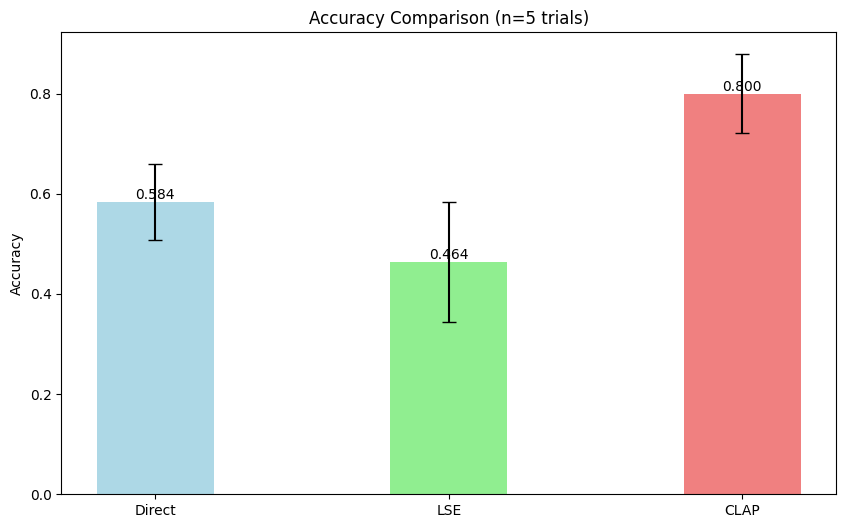

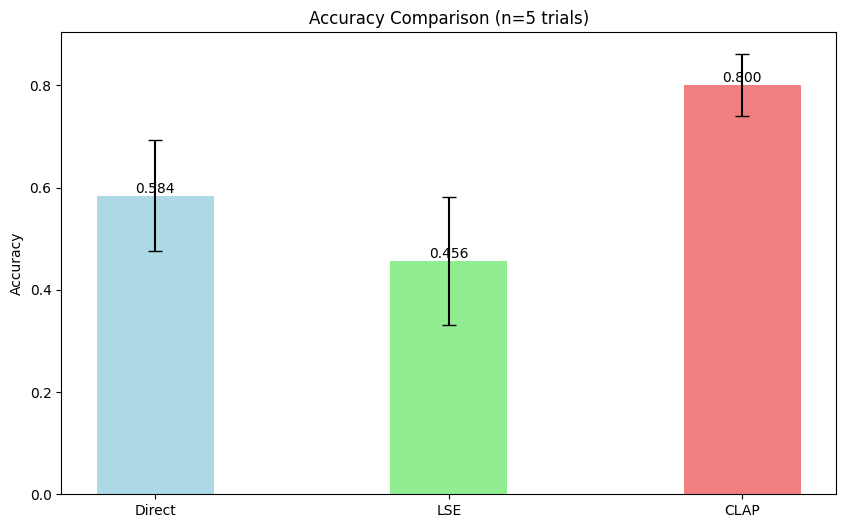

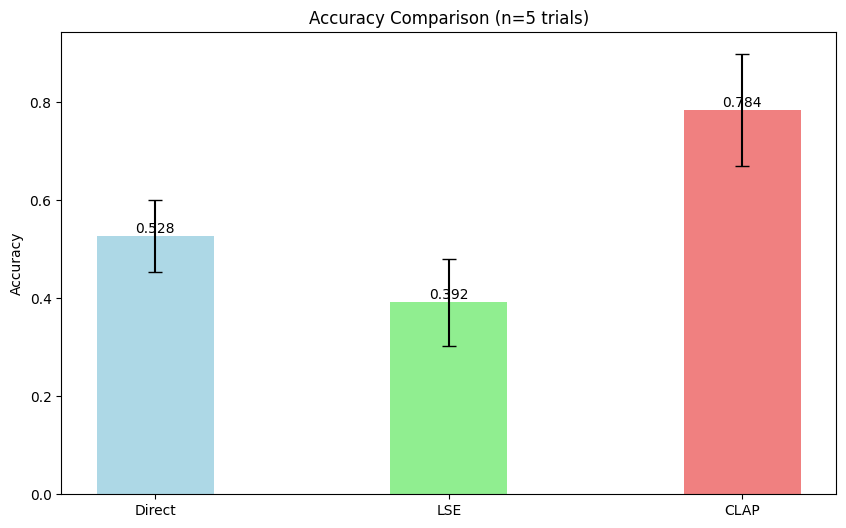

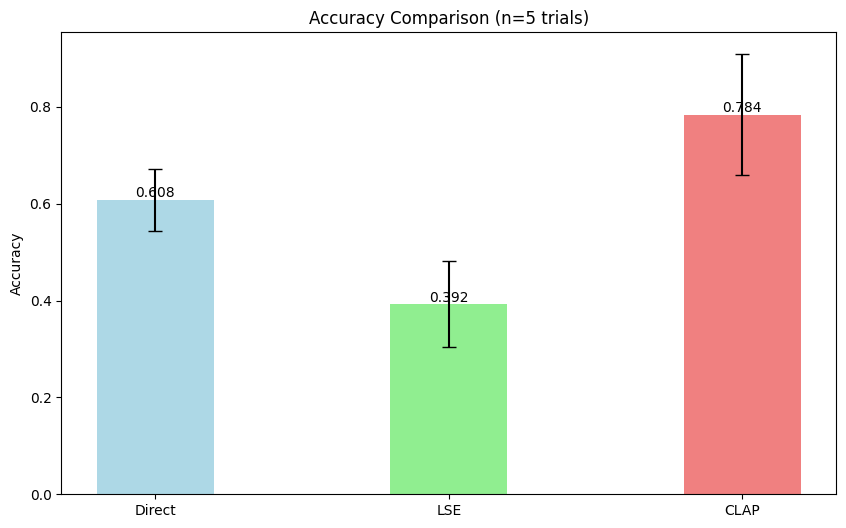

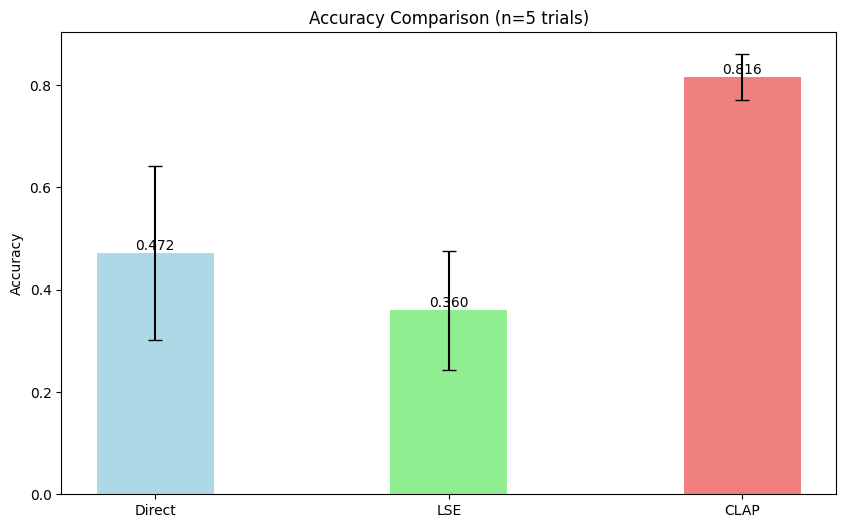

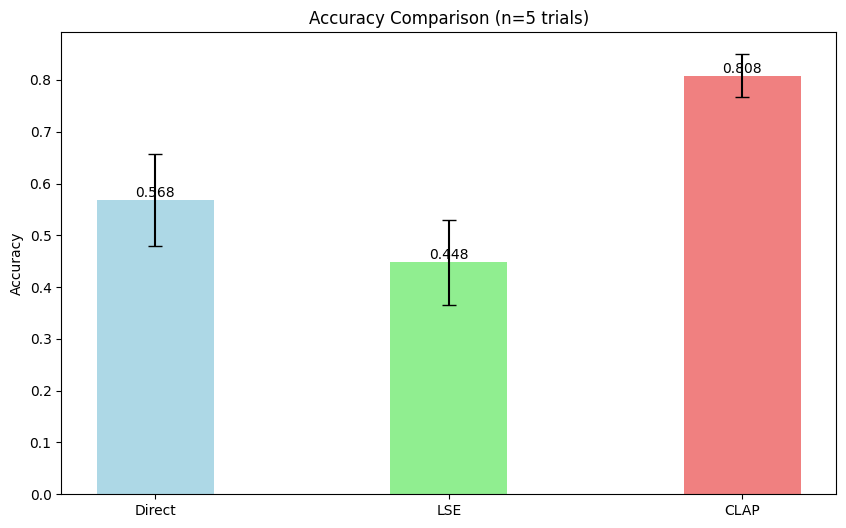

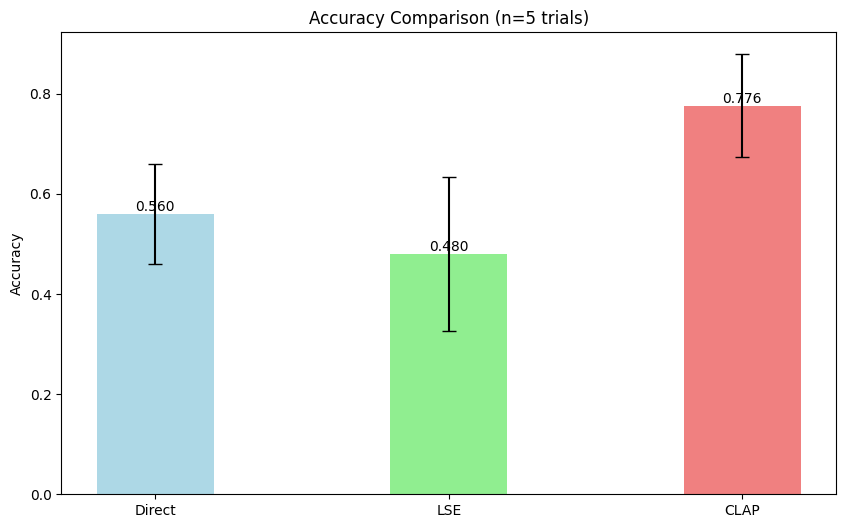

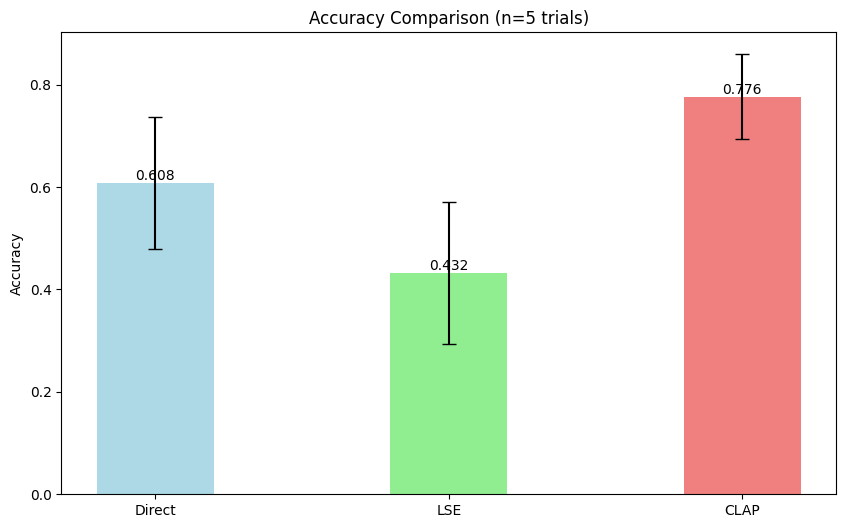

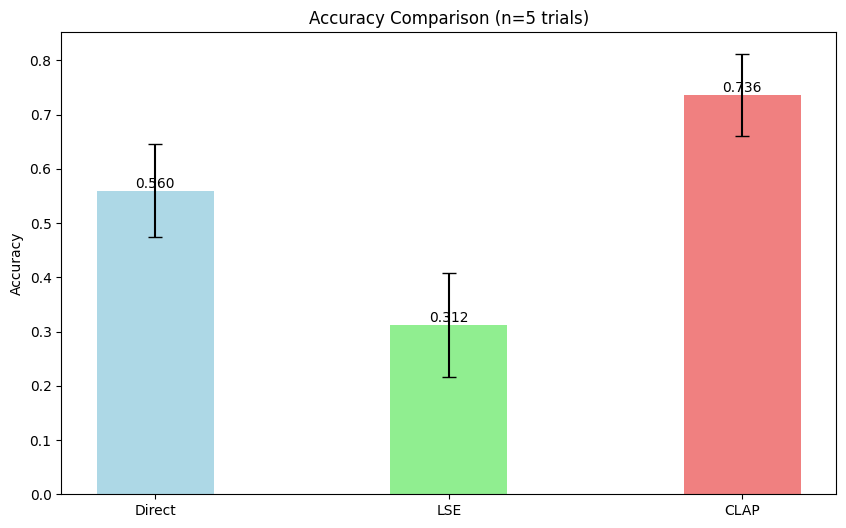

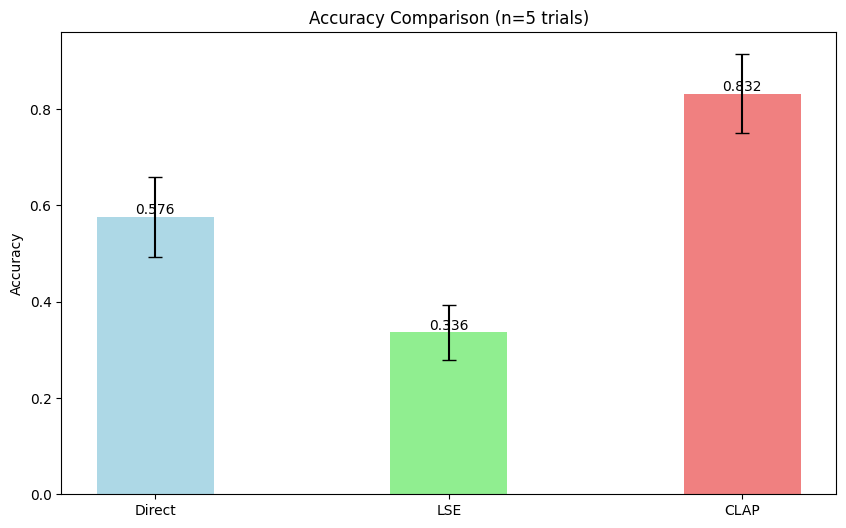

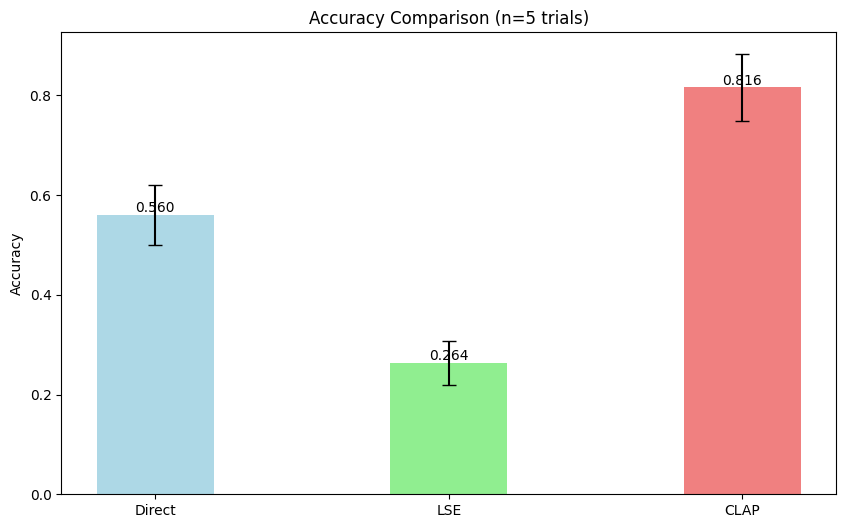

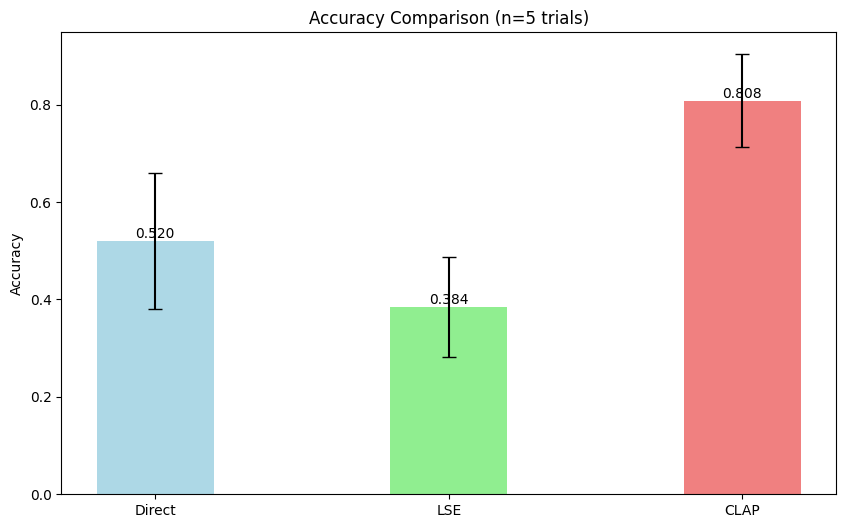

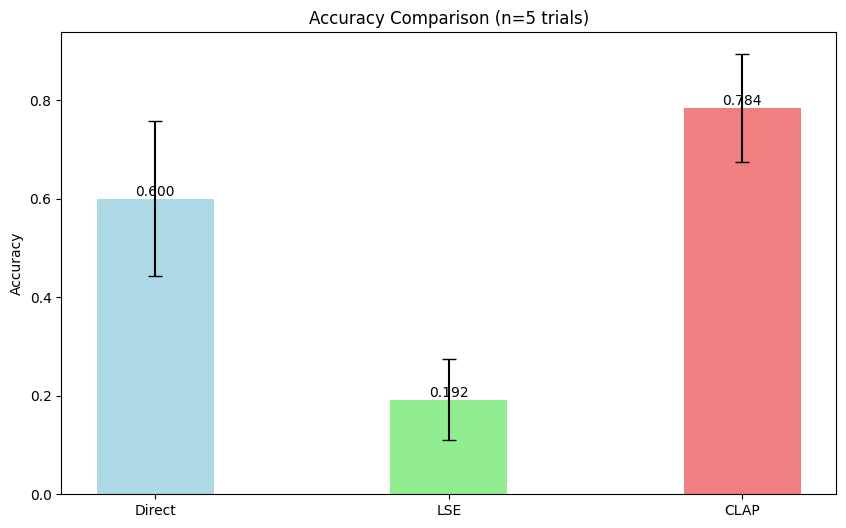

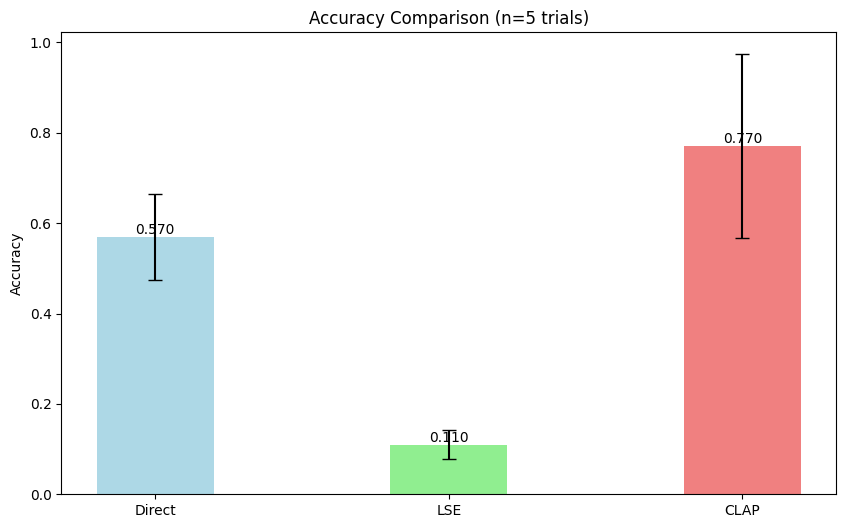

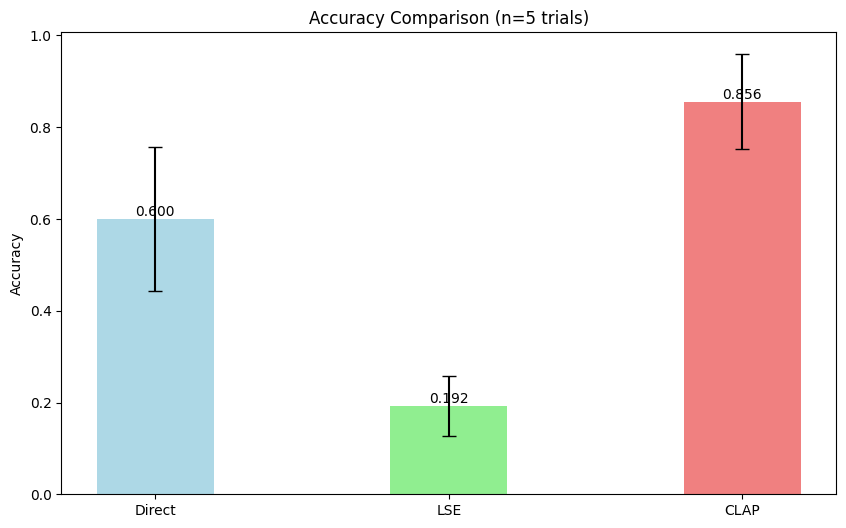

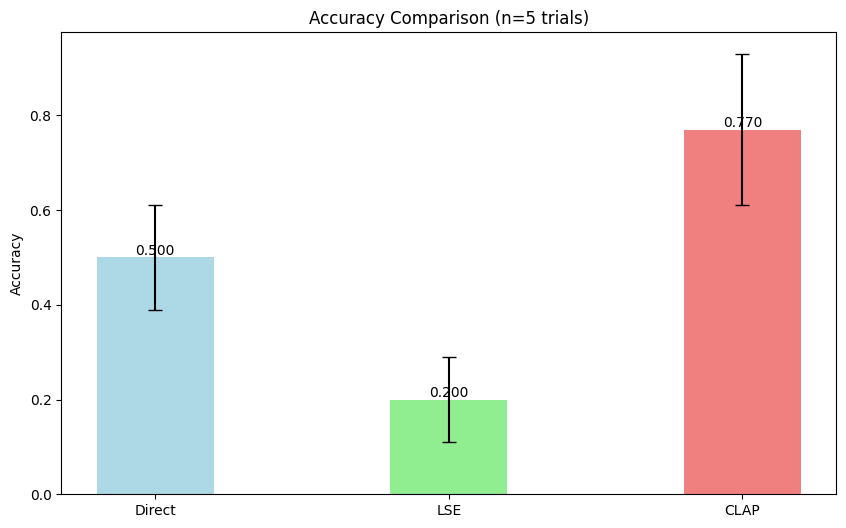

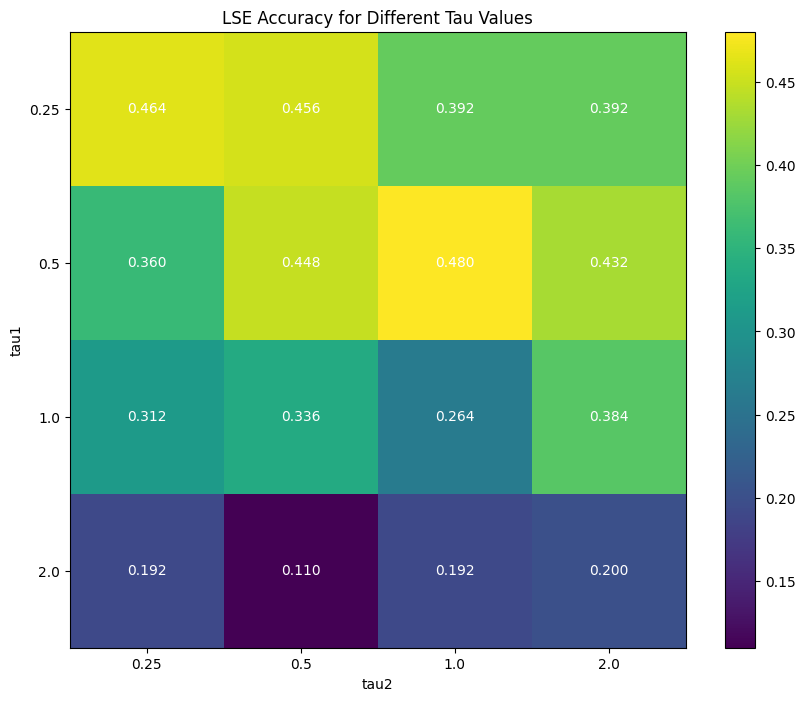


All Results (sorted by accuracy):
tau1: 0.5, tau2: 1.0, accuracy: 0.480 ± 0.153
tau1: 0.25, tau2: 0.25, accuracy: 0.464 ± 0.120
tau1: 0.25, tau2: 0.5, accuracy: 0.456 ± 0.125
tau1: 0.5, tau2: 0.5, accuracy: 0.448 ± 0.082
tau1: 0.5, tau2: 2.0, accuracy: 0.432 ± 0.138
tau1: 0.25, tau2: 1.0, accuracy: 0.392 ± 0.089
tau1: 0.25, tau2: 2.0, accuracy: 0.392 ± 0.089
tau1: 1.0, tau2: 2.0, accuracy: 0.384 ± 0.103
tau1: 0.5, tau2: 0.25, accuracy: 0.360 ± 0.116
tau1: 1.0, tau2: 0.5, accuracy: 0.336 ± 0.057
tau1: 1.0, tau2: 0.25, accuracy: 0.312 ± 0.096
tau1: 1.0, tau2: 1.0, accuracy: 0.264 ± 0.044
tau1: 2.0, tau2: 2.0, accuracy: 0.200 ± 0.090
tau1: 2.0, tau2: 0.25, accuracy: 0.192 ± 0.082
tau1: 2.0, tau2: 1.0, accuracy: 0.192 ± 0.065
tau1: 2.0, tau2: 0.5, accuracy: 0.110 ± 0.032


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def grid_search_taus():
    # Define tau values to test
    tau_vals = [0.25, 0.5]

    # Create all combinations of tau1 and tau2
    tau_combinations = list(itertools.product(tau_vals, tau_vals))

    # Store results
    results_grid = []

    # Run trials for each combination
    print("Running grid search...")
    for tau1, tau2 in tqdm(tau_combinations):
        results, _ = run_multiple_trials(n_trials=5, k=1, tau1=tau1, tau2=tau2)
        results_grid.append({
            'tau1': tau1,
            'tau2': tau2,
            'lse_mean': results['lse']['mean'],
            'lse_ci': results['lse']['ci']
        })

    # Find best combination
    best_result = max(results_grid, key=lambda x: x['lse_mean'])

    # Create heatmap
    tau_matrix = np.zeros((len(tau_vals), len(tau_vals)))
    for result in results_grid:
        i = tau_vals.index(result['tau1'])
        j = tau_vals.index(result['tau2'])
        tau_matrix[i, j] = result['lse_mean']

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(tau_matrix, cmap='viridis')

    # Add colorbar
    plt.colorbar(im)

    # Add labels
    ax.set_xticks(np.arange(len(tau_vals)))
    ax.set_yticks(np.arange(len(tau_vals)))
    ax.set_xticklabels(tau_vals)
    ax.set_yticklabels(tau_vals)

    # Add tau values as labels
    for i in range(len(tau_vals)):
        for j in range(len(tau_vals)):
            text = ax.text(j, i, f'{tau_matrix[i, j]:.3f}',
                         ha="center", va="center", color="w")

    plt.xlabel('tau2')
    plt.ylabel('tau1')
    plt.title('LSE Accuracy for Different Tau Values')

    return results_grid, best_result, fig

# Run grid search
results_grid, best_result, fig = grid_search_taus()

# Print results
print("\nGrid Search Results:")
print(f"Best configuration:")
print(f"tau1: {best_result['tau1']}")
print(f"tau2: {best_result['tau2']}")
print(f"LSE accuracy: {best_result['lse_mean']:.3f} ± {best_result['lse_ci']:.3f}")

# Show heatmap
plt.show()

# Print all results in a sorted format
print("\nAll Results (sorted by accuracy):")
sorted_results = sorted(results_grid, key=lambda x: x['lse_mean'], reverse=True)
for result in sorted_results:
    print(f"tau1: {result['tau1']}, tau2: {result['tau2']}, "
          f"accuracy: {result['lse_mean']:.3f} ± {result['lse_ci']:.3f}")

In [ ]:

# Directly get audio embeddings from audio files
audio_file = [
    '/content/audio_496.wav',
]
audio_embed = clap_model.get_audio_embedding_from_filelist(x = audio_file, use_tensor=False)
print(audio_embed[:,-20:])
print(audio_embed.shape)

# Get text embedings from texts:
text_data = ["I love the contrastive learning", "I love the pretrain model"]
text_embed = clap_model.get_text_embedding(text_data)
print(text_embed)
print(text_embed.shape)

# # Get text embedings from texts, but return torch tensor:
# text_data = ["I love the contrastive learning", "I love the pretrain model"]
# text_embed = model.get_text_embedding(text_data, use_tensor=True)
# print(text_embed)
# print(text_embed.shape)


[[-0.00042173  0.06528136  0.02409695  0.06523684 -0.09883564  0.00070209
  -0.04328492  0.03841274 -0.05651652 -0.03183561  0.07104283 -0.04438412
  -0.03241764 -0.03645592 -0.04415321  0.14029229 -0.02663309 -0.08336379
   0.0738675  -0.00972373]]
(1, 512)
[[-0.00919978  0.02500593  0.00363404 ...  0.01062    -0.00127951
  -0.0651798 ]
 [-0.02006619  0.03137505  0.08235695 ... -0.09679958  0.00108542
  -0.07113259]]
(2, 512)


In [ ]:

for M in mc_sizes:
  partial_PHI_B1 = PHI_B1[:M]
  partial_PHI_B2 = PHI_B2[:M]
  # partial_PHI_B1 = generate_uniform_hypersphere(M, partial_PHI_B1.shape[1])
  # partial_PHI_B2 = generate_uniform_hypersphere(M, partial_PHI_B2.shape[1])
  grid_lse = np.zeros((len(audio_paths), len(audio_paths)))
  for i in range(embeddings_A.shape[0]):
    for j in range(embeddings_C.shape[0]):
      for phi1, phi2 in zip(partial_PHI_B1, partial_PHI_B2):
        grid_lse[i, j] += torch.exp(embeddings_A[i] @ phi1.T.float() / tau + phi2.float() @ embeddings_C[j].T / tau).detach().cpu().numpy()

  acc_lse = get_row_diagonal_accuracy(grid_lse)
  print(f'Accuracy for M = {M}: {acc_lse}')
  plt.imshow(grid_lse)
  plt.show()

In [ ]:
direct_grid = embeddings_A @ embeddings_B.T
acc_direct = get_row_diagonal_accuracy(direct_grid)

print(acc_direct)

0.28


In [ ]:
direct_grid.shape

torch.Size([25, 25])

Accuracy for M = 4: 0.32


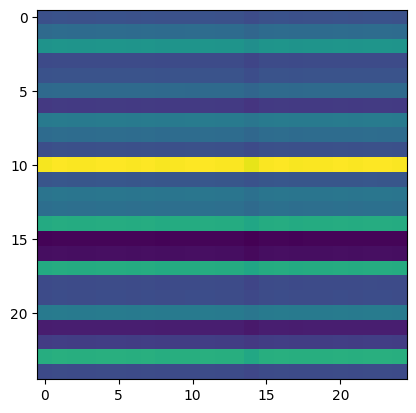

Accuracy for M = 16: 0.44


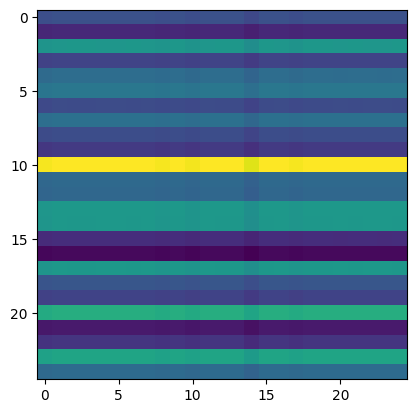

Accuracy for M = 64: 0.44


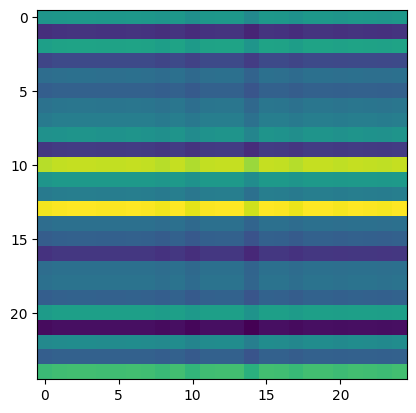

Accuracy for M = 128: 0.44


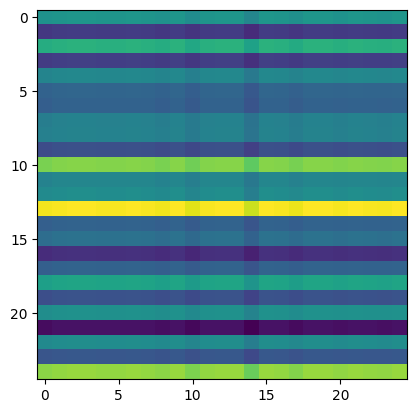

Accuracy for M = 256: 0.4


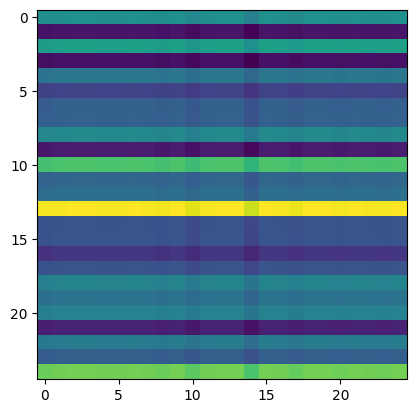

Accuracy for M = 512: 0.4


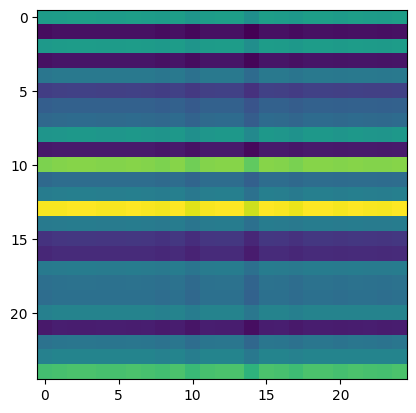

In [ ]:
mc_sizes = [4, 16, 64, 128, 256, 512]
tau = 5

for M in mc_sizes:
  partial_PHI_B1 = PHI_B1[:M]
  partial_PHI_B2 = PHI_B2[:M]
  # partial_PHI_B1 = generate_uniform_hypersphere(M, partial_PHI_B1.shape[1])
  # partial_PHI_B2 = generate_uniform_hypersphere(M, partial_PHI_B2.shape[1])
  grid_lse = np.zeros((len(audio_paths), len(audio_paths)))
  for i in range(embeddings_A.shape[0]):
    for j in range(embeddings_C.shape[0]):
      for phi1, phi2 in zip(partial_PHI_B1, partial_PHI_B2):
        grid_lse[i, j] += torch.exp(embeddings_A[i] @ phi1.T.float() / tau + phi2.float() @ embeddings_C[j].T / tau).detach().cpu().numpy()

  acc_lse = get_row_diagonal_accuracy(grid_lse)
  print(f'Accuracy for M = {M}: {acc_lse}')
  plt.imshow(grid_lse)
  plt.show()